<a href="https://colab.research.google.com/github/Camilo899/FundamenteoDeepLearnig/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocesado**

---



---



# Importar Librerías

---



In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Montar Google Drive (esto es necesario para acceder al conjunto de datos)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- **Nota**: Los datos fueron sacaron de una base de datos hospedada en Kaggle en el siguiente enlace: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

## Creando Generador de Datos (Aumentado)

---



In [11]:
data_gen = ImageDataGenerator(
    rescale=1./255,  # Normalizar los valores de los píxeles a [0,1]
    rotation_range=40,  # Rango de grados para rotaciones aleatorias
    width_shift_range=0.2,  # Rango de cambio aleatorio en el ancho de la imagen
    height_shift_range=0.2,  # Rango de cambio aleatorio en la altura de la imagen
    shear_range=0.2,  # Rango para las transformaciones de corte
    zoom_range=0.2,  # Rango para el zoom aleatorio
    horizontal_flip=True,  # Habilitar volteo horizontal aleatorio
    fill_mode='nearest',  # Cómo llenar los píxeles que pueden quedar fuera de la imagen después de una transformación
    validation_split=0.2  # Porcentaje de datos a utilizar como conjunto de validación
)


# Preparando los Generadores de Datos

---



In [12]:
train_data = data_gen.flow_from_directory(
    '/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    '/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2418 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


# Visualización de los datos

---



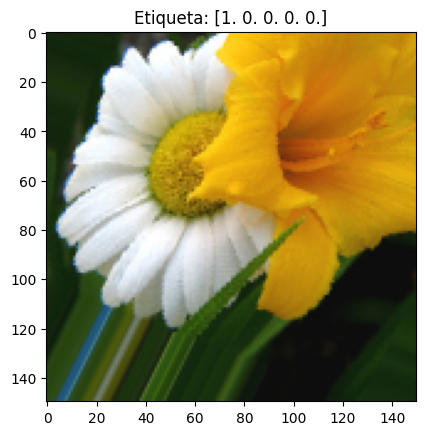

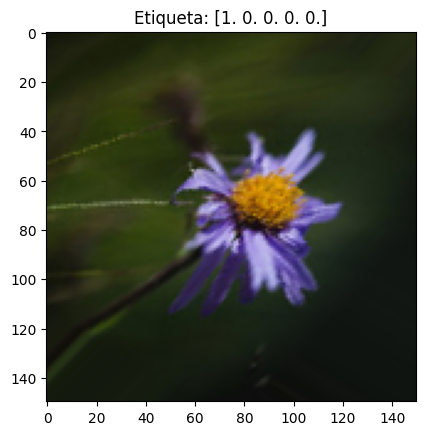

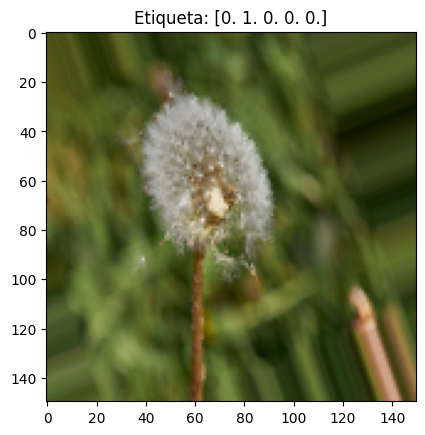

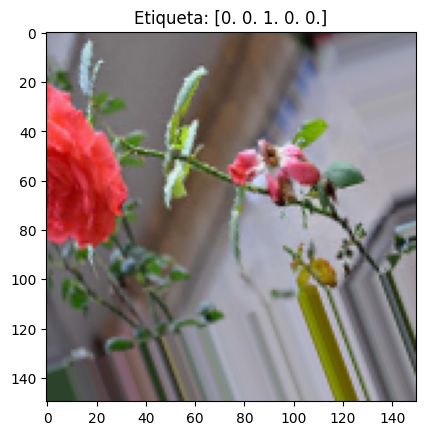

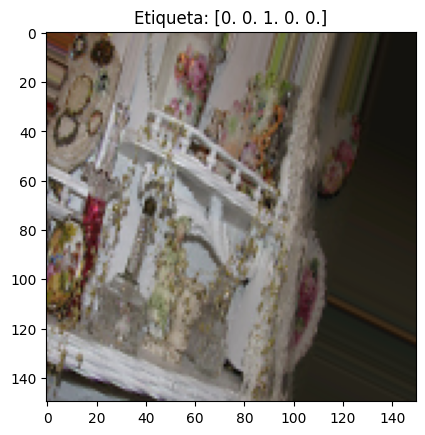

In [14]:
# Obtén un lote de imágenes y etiquetas del generador de datos
images, labels = next(train_data)
# Calcula el índice medio
middle = len(images) // 2
# Muestra las primeras 5 imágenes del medio
for i in range(middle - 2, middle + 3):
    plt.imshow(images[i])
    plt.title('Etiqueta: ' + str(labels[i]))
    plt.show()

# Guardando los datos preprocesados

---



In [ ]:
# Guarda los datos preprocesados
np.save('train_data.npy', train_data)
np.save('val_data.npy', val_data)

# Cargar los datos preprocesados

---



In [ ]:
# Carga los datos preprocesados
train_data = np.load('train_data.npy')
val_data = np.load('val_data.npy')


## Definiendo el Modelo

---



In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 tipos de flores
])


# Compilando el Moldeo

---



In [16]:
from tensorflow.keras import metrics

# Compila el modelo con las métricas deseadas
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),
        metrics.AUC(name='auc'),
    ]
)


# Entrenanado el Modelo

---



In [8]:
# Entrena el modelo
model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
76/76 [==============================] - 533s 7s/step - loss: 1.4795 - accuracy: 0.3950 - precision: 0.5268 - recall: 0.1096 - auc: 0.7282 - val_loss: 1.3630 - val_accuracy: 0.4219 - val_precision: 0.5472 - val_recall: 0.2266 - val_auc: 0.7714
Epoch 2/10
76/76 [==============================] - 124s 2s/step - loss: 1.1759 - accuracy: 0.5244 - precision: 0.6319 - recall: 0.2833 - auc: 0.8247 - val_loss: 1.4869 - val_accuracy: 0.4531 - val_precision: 0.5488 - val_recall: 0.3516 - val_auc: 0.7754
Epoch 3/10
76/76 [==============================] - 123s 2s/step - loss: 1.0672 - accuracy: 0.5885 - precision: 0.6856 - recall: 0.3987 - auc: 0.8575 - val_loss: 1.2298 - val_accuracy: 0.5312 - val_precision: 0.6301 - val_recall: 0.3594 - val_auc: 0.8259
Epoch 4/10
76/76 [==============================] - 123s 2s/step - loss: 1.0143 - accuracy: 0.6042 - precision: 0.7123 - recall: 0.4433 - auc: 0.8703 - val_loss: 1.1668 - val_accuracy: 0.5234 - val_precision: 0.6618 - val_recall: 0.351

# Evaluando el Modelo

---



In [9]:
# Evalúa el modelo
loss, accuracy, precision, recall, auc = model.evaluate(val_data)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precisión: {accuracy}')
print(f'Exhaustividad: {recall}')
print(f'Puntaje F1: {f1_score}')

4/4 [==============================] - 3s 708ms/step - loss: 1.1399 - accuracy: 0.6250 - precision: 0.7234 - recall: 0.5312 - auc: 0.8612
Precisión: 0.625
Exhaustividad: 0.53125
Puntaje F1: 0.6126126030630978


# Realizando Predicciones

---



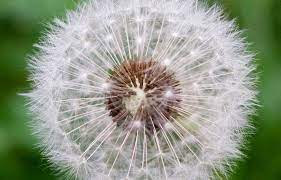

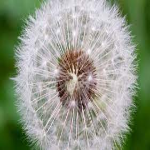

1

In [10]:
from google.colab.patches import cv2_imshow
import cv2


image = cv2.imread('/content/drive/MyDrive/UDEA/2023-02/FundamentosDeepLearning/Proyecto/IMG/Diente_1.jpg')

cv2_imshow(image)
image = cv2.resize(image, (150, 150))
cv2_imshow(image)

image = image / 255
image

image.shape

image = image.reshape(-1, 150, 150, 3)
image.shape

result = model(image)
result = np.argmax(result)
result
